<a href="https://colab.research.google.com/github/eermis1/Data_Science_Repository/blob/master/Auto-Encoders/FCN_Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Fully Connected Neural Network Autoencoder Application**
*A MNIST FCN Autoencoder Application with Keras by Evren Ermiş for BOUN SWE.591 (29-Apr-2020)*

## **1. Import Required Libraries**

In [0]:
%tensorflow_version 1.x
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten
from keras import initializers
from keras.models import Model
from keras import backend as K
from keras import losses
from sklearn.manifold import TSNE
print(tf.__version__)

TensorFlow 1.x selected.


Using TensorFlow backend.


1.15.2


## **2. Extract and Evaluate Data**

In [0]:
# Exract data from MNIST dataset.

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Shape of x_train = (60000, 28, 28)
Shape of x_test = (10000, 28, 28)

Now, lets have a look at a particular data in training set

Max pixel data of x_train[0]= 255
Min pixel data of x_train[0]= 0

.  --> As you seen as above, the pixel data is not in a range between 0 and 1 (grayscale)
.  --> To improve the the performance, make it easy to learn for network it is better to normalize them.

.  --> Just an illusration


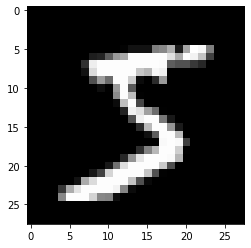

In [0]:
# Evaluate dataset

print("Shape of x_train =" + " " + str(x_train.shape))
print("Shape of x_test =" + " " + str(x_test.shape))

print("\n" + "Now, lets have a look at a particular data in training set" +"\n")

print("Max pixel data of x_train[0]=" + " " + str(x_train[0].max()))
print("Min pixel data of x_train[0]=" + " " + str(x_train[0].min()) + "\n")
print(".  --> As you seen as above, the pixel data is not in a range between 0 and 1 (grayscale)")
print(".  --> To improve the the performance, make it easy to learn for network it is better to normalize them." + "\n")

print(".  --> Just an illusration")
plt.imshow(x_train[0], cmap='gray')
plt.show()

In [0]:
# Normalization of x_train, x_test (making the pixel values between 0 and 1

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

# Reshape / Flatten the x_train and x_test data to make them proper to be an input for FCN

x_train = np.reshape(x_train, (len(x_train), 784))  
x_test = np.reshape(x_test, (len(x_test), 784)) 

# Check whether is everything OK
print("Shape of x_train =" + " " + str(x_train.shape))
print("Shape of x_test =" + " " + str(x_test.shape))

#x_train[0] Process is completed 

Shape of x_train = (60000, 784)
Shape of x_test = (10000, 784)


## **3. Building the Model**

In [0]:
input = Input(shape=(784,))

# 1st FCN Layer - Encoder
x = Dense(200, activation="relu", kernel_initializer = initializers.glorot_uniform(seed=2))(input)

# 2nd FCN Layer - Encoder
x = Dense(128, activation="relu", kernel_initializer = initializers.glorot_uniform(seed=2))(x)

# 3rd FCN Layer - Encoded Version - Embeddings Created
encoded = Dense(30, activation="sigmoid", kernel_initializer = initializers.glorot_uniform(seed=2),name="encoded")(x)

# 4th FCN Layer - Decoder
x = Dense(128, activation="relu", kernel_initializer = initializers.glorot_uniform(seed=2))(encoded)

# 5th FCN Layer - Decoder
x = Dense(200, activation="relu", kernel_initializer = initializers.glorot_uniform(seed=2))(x)

# 6rd FCN Layer - Decoder Version - Final Output
decoded = Dense(784, activation="sigmoid", kernel_initializer = initializers.glorot_uniform(seed=2),name="decoded")(x)

# Overall Model
autoencoder = Model(input, decoded)

# See how is the dimentionality
autoencoder.summary()


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               157000    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               25728     
_________________________________________________________________
encoded (Dense)              (None, 30)                3870      
_________________________________________________________________
dense_3 (Dense)              (None, 128)               3968      
_________________________________________________________________
dense_4 (Dense)              (None, 200)               25800     
____________________________________________

In [0]:
autoencoder.compile(optimizer='adam', loss=losses.mean_squared_error)

autoencoder.fit(x_train, x_train, epochs=10, batch_size=32,
                shuffle=True,
                validation_data=(x_test, x_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 13s 218us/step - loss: 0.0118 - val_loss: 0.0079
Epoch 2/10
60000/60000 [==============================] - 13s 221us/step - loss: 0.0071 - val_loss: 0.0063
Epoch 3/10
60000/60000 [==============================] - 13s 215us/step - loss: 0.0058 - val_loss: 0.0052
Epoch 4/10
60000/60000 [==============================] - 12s 208us/step - loss: 0.0050 - val_loss: 0.0046
Epoch 5/10
60000/60000 [==============================] - 12s 202us/step - loss: 0.0045 - val_loss: 0.0042
Epoch 6/10
60000/60000 [==============================] - 12s 201us/step - loss: 0.0041 - val_loss: 0.0039
Epoch 7/10
60000/60000 [==============================] - 12s 202us/step - loss: 0.0039 - val_loss: 0.0037
Epoch 8/10
60000/60000 [==============================] - 12s 205us/step - loss: 0.0036 - val_loss: 0.0035
Epoch 9/10
60000/60000 [==============================] - 12s 205us/step - loss: 0.0035 - val

In [0]:
test_loss = autoencoder.evaluate(x_test, x_test)

10000/10000 [==============================] - 1s 57us/step


In [0]:
print("Test Loss is=" + " " + str(round(test_loss,5)))

Test Loss is= 0.0032


In [0]:
# Getting Predictions & Evaluation

predictions  = autoencoder.predict(x_test)
predictions.shape

(10000, 784)

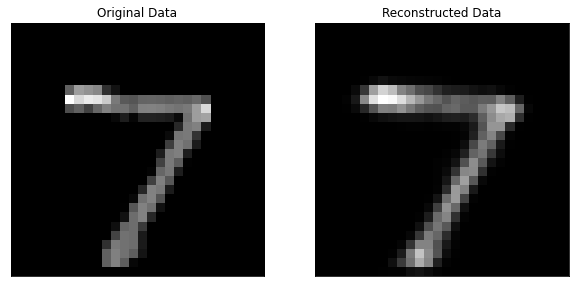

In [0]:
# Another Evaluation - Continue

plt.figure(figsize=(10, 10))

# Original Data
ax = plt.subplot(1, 2, 1)
plt.imshow(x_test[0].reshape(28, 28))
plt.gray()
ax.set_title('Original Data')
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

# Reconstructed Data
ax = plt.subplot(1, 2, 2)
plt.imshow(predictions[0].reshape(28, 28))
plt.gray()
ax.set_title('Reconstructed Data')
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)


## **4. Task-3 | tSNE Mapping**

In [0]:
# Get Data from Layer - Encoded/Embeddings
# https://keras.io/getting-started/faq/#how-can-i-obtain-the-output-of-an-intermediate-layer

intermediate_layer_model = Model(inputs=autoencoder.input,
                                 outputs=autoencoder.get_layer("encoded").output)
embeddings = intermediate_layer_model.predict(x_test)
embeddings.shape

(10000, 30)

In [0]:
# Transform the x_test and encoded data by using t-SNE
# https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

tranformed_test_embeddings = TSNE(n_components=2).fit_transform(embeddings)
tranformed_xtest = TSNE(n_components=2).fit_transform(x_test)

In [0]:
print("tranformed_test_embeddings shape is=" + " " + str(tranformed_test_embeddings.shape))
print("tranformed_xtest shape is=" + " " + str(tranformed_xtest.shape))

tranformed_test_embeddings shape is= (10000, 2)
tranformed_xtest shape is= (10000, 2)


In [0]:
# Test Embeddings Data Preparations

# Getting Labels from y_test
array = []
for i in range(len(y_test)):
  array.append(y_test[i])
array = np.asarray(array)

# Gathering Them into Pandas DF
df_embed = pd.DataFrame(tranformed_test_embeddings, columns={"dim1", "dim2"})
df_embed["labels"] = array
df_embed.head()

,dim2,dim1,labels
0,63.819496,-19.757782,7
1,-13.291184,-65.735703,2
2,36.588737,-73.110794,1
3,-25.161217,54.446243,0
4,19.461628,55.392384,4


In [0]:
# Original Test Data (x_test) Preparations

# Getting Labels from y_test
array_2 = []
for i in range(len(y_test)):
  array_2.append(y_test[i])
array_2 = np.asarray(array_2)

# Gathering Them into Pandas DF
df_orj = pd.DataFrame(tranformed_xtest, columns={"dim1","dim2"})
df_orj["labels"] = array_2
df_orj.head()

,dim2,dim1,labels
0,-2.874965,-60.575623,7
1,-63.562077,29.707607,2
2,-60.308296,-26.339220,1
3,9.836399,51.897533,0
4,72.055099,-11.876710,4


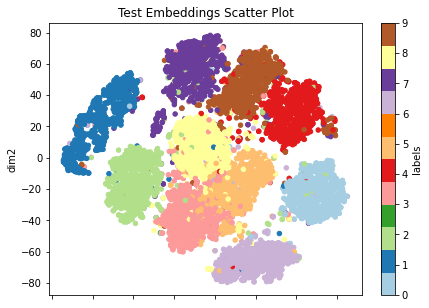

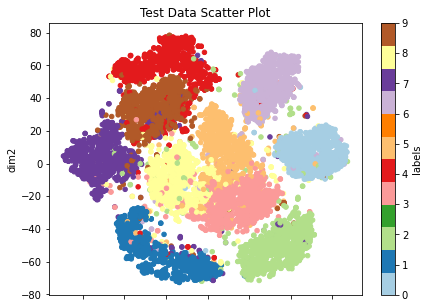

In [0]:
# Plotting the Scatter Plots
ax1 = df_embed.plot.scatter(x='dim1',
                            y='dim2',
                            c='labels',
                            title="Test Embeddings Scatter Plot",
                            figsize=(7,5),
                            colormap='Paired')

ax2 = df_orj.plot.scatter(x='dim1',
                          y='dim2',
                          c='labels',
                          title="Test Data Scatter Plot",
                          figsize=(7,5),
                          colormap='Paired')



## **5. Task-4 | Comparison of Original Image and Reconstructed Image**

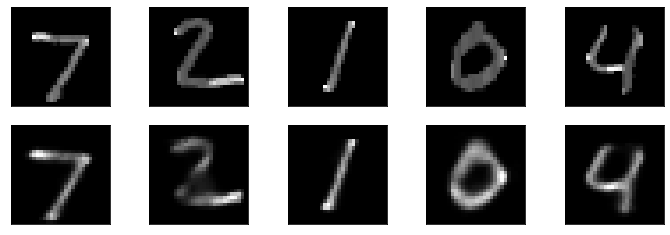

In [0]:
plt.figure(figsize=(12, 4))
for i in range(5): # Show 5 Images
    # Original image
    ax = plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


    # Reconstructed image
    ax = plt.subplot(2, 5, i + 1 + 5)
    plt.imshow(predictions[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()